In [1]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [2]:
def split(x,y):
    n =240//4
    trainx = np.zeros(240-n)
    trainy = np.zeros(240-n)
    testx = np.zeros(n)
    testy = np.zeros(n)
    
    indtrain =0
    
    indtest =0
    for a in range(240):
        if (a % 4 !=0 ):
            trainx[indtrain]=x[a]
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest]=x[a]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx , testy
    

In [3]:
data=pd.read_csv("data10.csv")

In [4]:
x=np.array(data['x'])
y=np.array(data['y'])
trainx,trainy,  testx,testy = split(x,y)

In [5]:
def normalize(x):
  X = np.zeros(len(x))
  for i in range (len(x)):
    X[i] = (x[i] - np.mean(trainy))/ sqrt((np.var(trainy)))
  return X

def normalize_x(x):
  X = np.zeros(len(x))
  for i in range (len(x)):
    X[i] = (x[i] - np.mean(trainx))/ sqrt((np.var(x)))
  return X

In [6]:
data.describe()

,x,y
count,240.000000,240.000000
mean,-0.100000,-43.910874
std,13.885244,77310.172183
min,-24.000000,-211525.076890
25%,-12.050000,-38210.462974
50%,-0.100000,-3204.081743
75%,11.850000,42815.168808
max,23.800000,232194.622861


In [7]:
def predict(x, theta):
  s=0.0
  for i in range(0,len(theta)):
    s=s+theta[i]*x**i
  return s

In [25]:
def calculate_predictions(x, theta):
  prediction = np.zeros(len(x))
  for i in range(0,len(x)):
    prediction[i]=predict(x[i], theta)
   
  return prediction

In [9]:
def gradient_descent_pol(x,y,degre):
    theta =np.zeros(degre+1)
    pas= 0.01
    predictions =np.zeros(degre+1)
    d=np.zeros(degre+1)
    predictions = calculate_predictions(x, theta);
    diff = np.array(calculate_predictions(x, theta))-y
    errors_x1 = diff
    d[0]=-(2.0 / len(x))*np.sum(errors_x1)
    for i in range(1,degre + 1):
      errors_x2 = diff*puissance(x,i)
      d[i]=-(2 / len(x))*np.sum(errors_x2)
    nor=np.linalg.norm(d)
    #k=f(x,theta,y)
    i=0
    while (nor>0.001):
        theta = theta +pas*d
        predictions = calculate_predictions(x, theta);
        diff = predictions-y
        errors_x1 = diff
        d[0]=-(2.0 / len(x))*np.sum(errors_x1)
        for i in range(1,degre + 1):
          errors_x2 = diff*puissance(x,i)
          d[i]=-(2 / len(x))*np.sum(errors_x2)
        nor=np.linalg.norm(d)
        i
        #print(nor)
        #k=f(x,theta,y)
    return theta;


In [10]:
def ls(x, theta , y):
  l =len(x)
  res = np.zeros(l)
  predictions = calculate_predictions(x, theta);
  diff = predictions-y
  ls = puissance(diff,2)
  res = (1.0/l) *np.sum(ls)
  return res


In [11]:
def puissance(x,degre):
  l =len(x)
  res = np.zeros(l)
  for i  in range(0, l):
    res[i]=x[i]**degre
  return res


In [12]:
w1 = gradient_descent_pol(normalize_x(trainx),normalize(trainy),2)

In [13]:
w2 = gradient_descent_pol(normalize_x(trainx),normalize(trainy),3)

In [14]:
w3 = gradient_descent_pol(normalize_x(trainx),normalize(trainy),4)

In [15]:
l1=ls(normalize_x(testx),w1 ,normalize_x(testy))
l2=ls(normalize_x(testx),w2 ,normalize_x(testy))
l3=ls(normalize_x(testx),w3 ,normalize_x(testy))
print("Erreur empirique pour k=2 : ", l1)
print("Erreur empirique pour k=3 : ", l2)
print("Erreur empirique pour k=4: ", l3)

Erreur empirique pour k=2 :  0.30314709755384206
Erreur empirique pour k=3 :  0.15611317812212033
Erreur empirique pour k=4:  0.15770346284070244


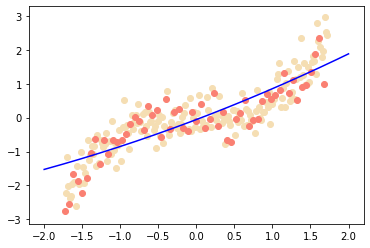

In [16]:
l = np.linspace(-2, 2, 200)
plt.scatter(normalize_x(trainx),normalize(trainy),color='wheat')
plt.scatter(normalize_x(testx),normalize(testy),color='salmon')
plt.plot(l,predict(l,w1),color='blue')
plt.show()

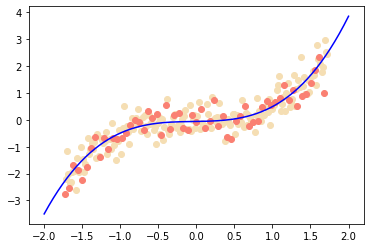

In [17]:
l = np.linspace(-2, 2, 200)
plt.scatter(normalize_x(trainx),normalize(trainy),color='wheat')
plt.scatter(normalize_x(testx),normalize(testy),color='salmon')
plt.plot(l,predict(l,w2),color='blue')
plt.show()

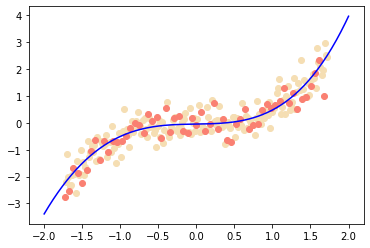

In [18]:
l = np.linspace(-2, 2, 200)
plt.scatter(normalize_x(trainx),normalize(trainy),color='wheat')
plt.scatter(normalize_x(testx),normalize(testy),color='salmon')
plt.plot(l,predict(l,w3),color='blue')
plt.show()

In [19]:
np.var(trainy)

6004211984.5844555

In [26]:
def var(theta):
    a = normalize(trainy)
    h = a - calculate_predictions(normalize(trainx), theta)
    v = h**2
    return np.mean(v)/len(h)

In [27]:
l1= var(w1)
l2=var(w2)
l3=var(w3)
print("var  k=2 : ", l1)
print("var  k=3 : ", l2)
print("var  k=4:  ", l3)

var  k=2 :  0.005587955999086331
var  k=3 :  0.005575667933871489
var  k=4:  0.005567390670066829
